### Assignment: 
Employee Attrition Prediction Using Machine Learning Decision Trees

#### Masongo Umar 
2018/HD05/1967U 

1800738510

### 1. Exploratory Data Analysis (EDA)
Load the dataset and perform initial data exploration

In [24]:
import pandas as pd
import numpy as np

#Load the dataset
df = pd.read_csv ('employee_attrition_dataset.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [25]:
#View the dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

The dataset 35 columns 1470 rows

In [26]:
# Check for dupulicates
df.duplicated().value_counts()

False    1470
dtype: int64

Dataset has no duplicate rows

In [27]:
#Check the summary statistics
#This provide valuable insights into the distribution, central tendency, and variability of the data
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [28]:
# Check for missing values
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

Dataset has no null values

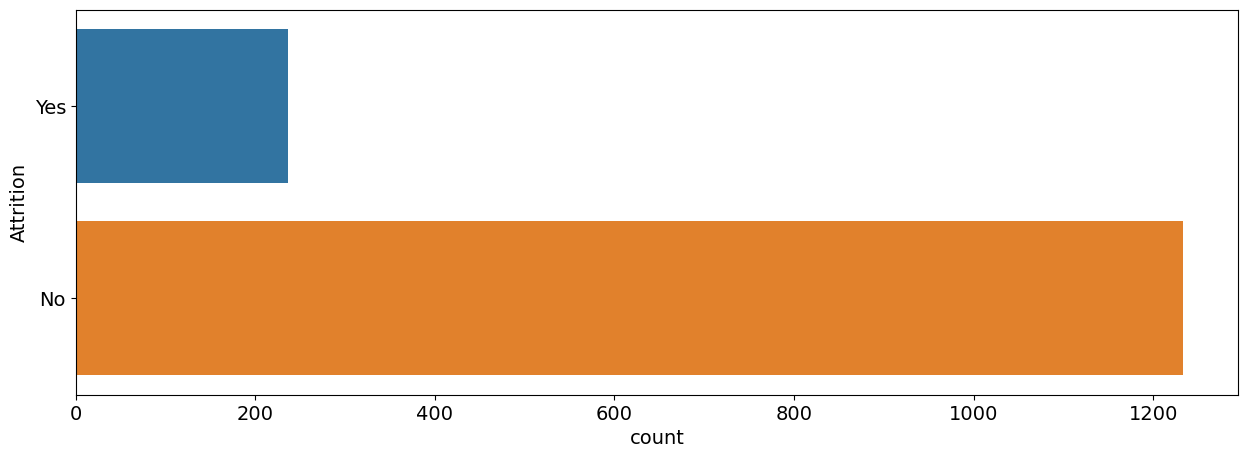

In [29]:
#Visualize the data using a graphs
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline

plt.figure(figsize =(15,5))
plt.rc("font" ,size=14)
sns.countplot(y='Attrition',data=df)
plt.show()

Dataset contains 237 (Yes) number of people who left the company, and 1233 No (Number of people who didnt leave the company)

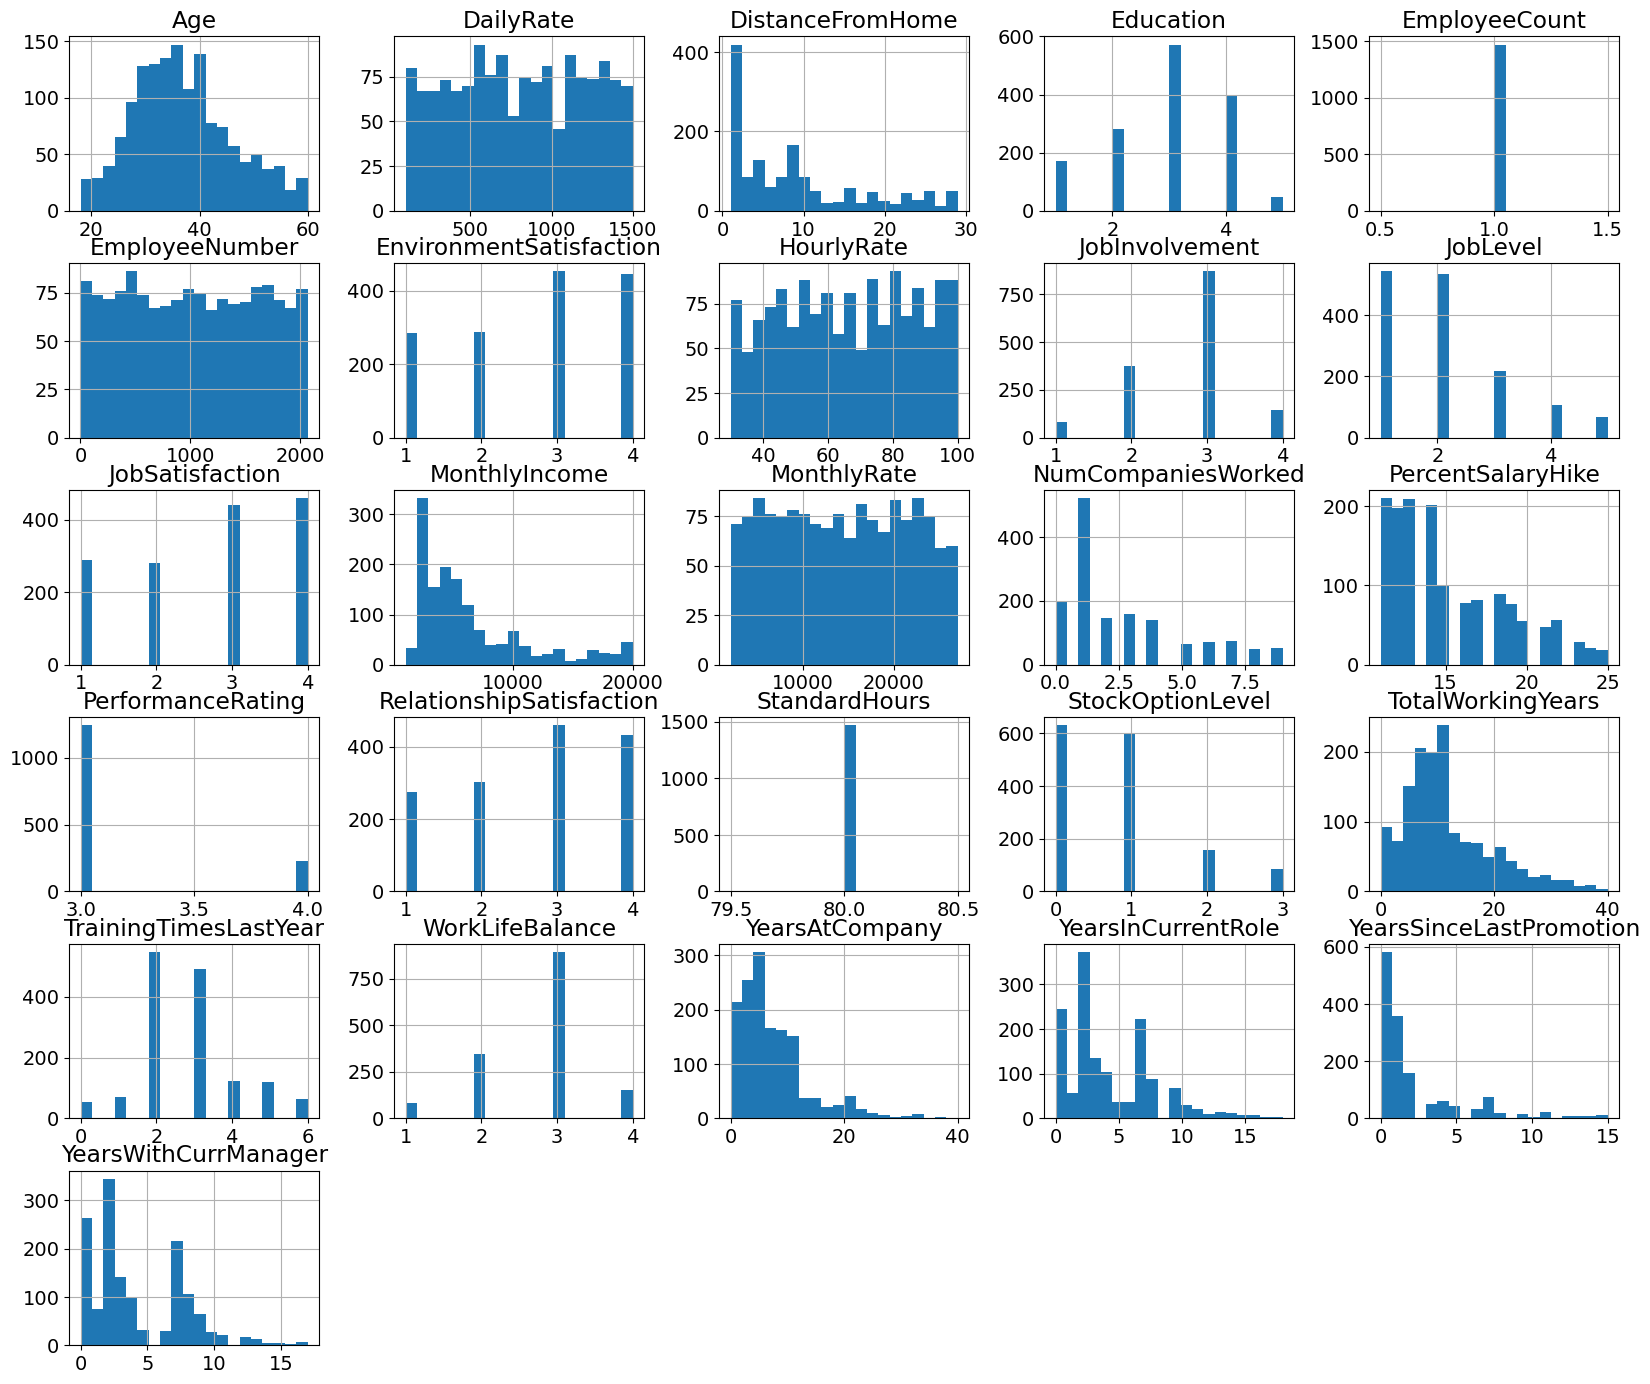

In [30]:
# Histogram showing distribution of values in different features
df.hist(bins=20, figsize=(20, 17))
plt.show()

### 2. Feature Selection and Importance Analysis
Data preprocessing and encoding

In [31]:
# Features EmployeeNumber, EmployeeCount, StandardHours, and Over18 have constant values and thus can be dropped.
df.drop(['EmployeeNumber', 'EmployeeCount', 'StandardHours', 'Over18'], axis=1, inplace=True)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [32]:
# Get Categorical features
categorical = df.select_dtypes(include=['object']).columns
categorical

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [33]:
# Get Numerical Variables
numerical = df.select_dtypes(include=['int64']).columns
numerical

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [34]:
# Encoding categorical features using Label Encoding
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

for column in categorical:
    df[column] = lb.fit_transform(df[column])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


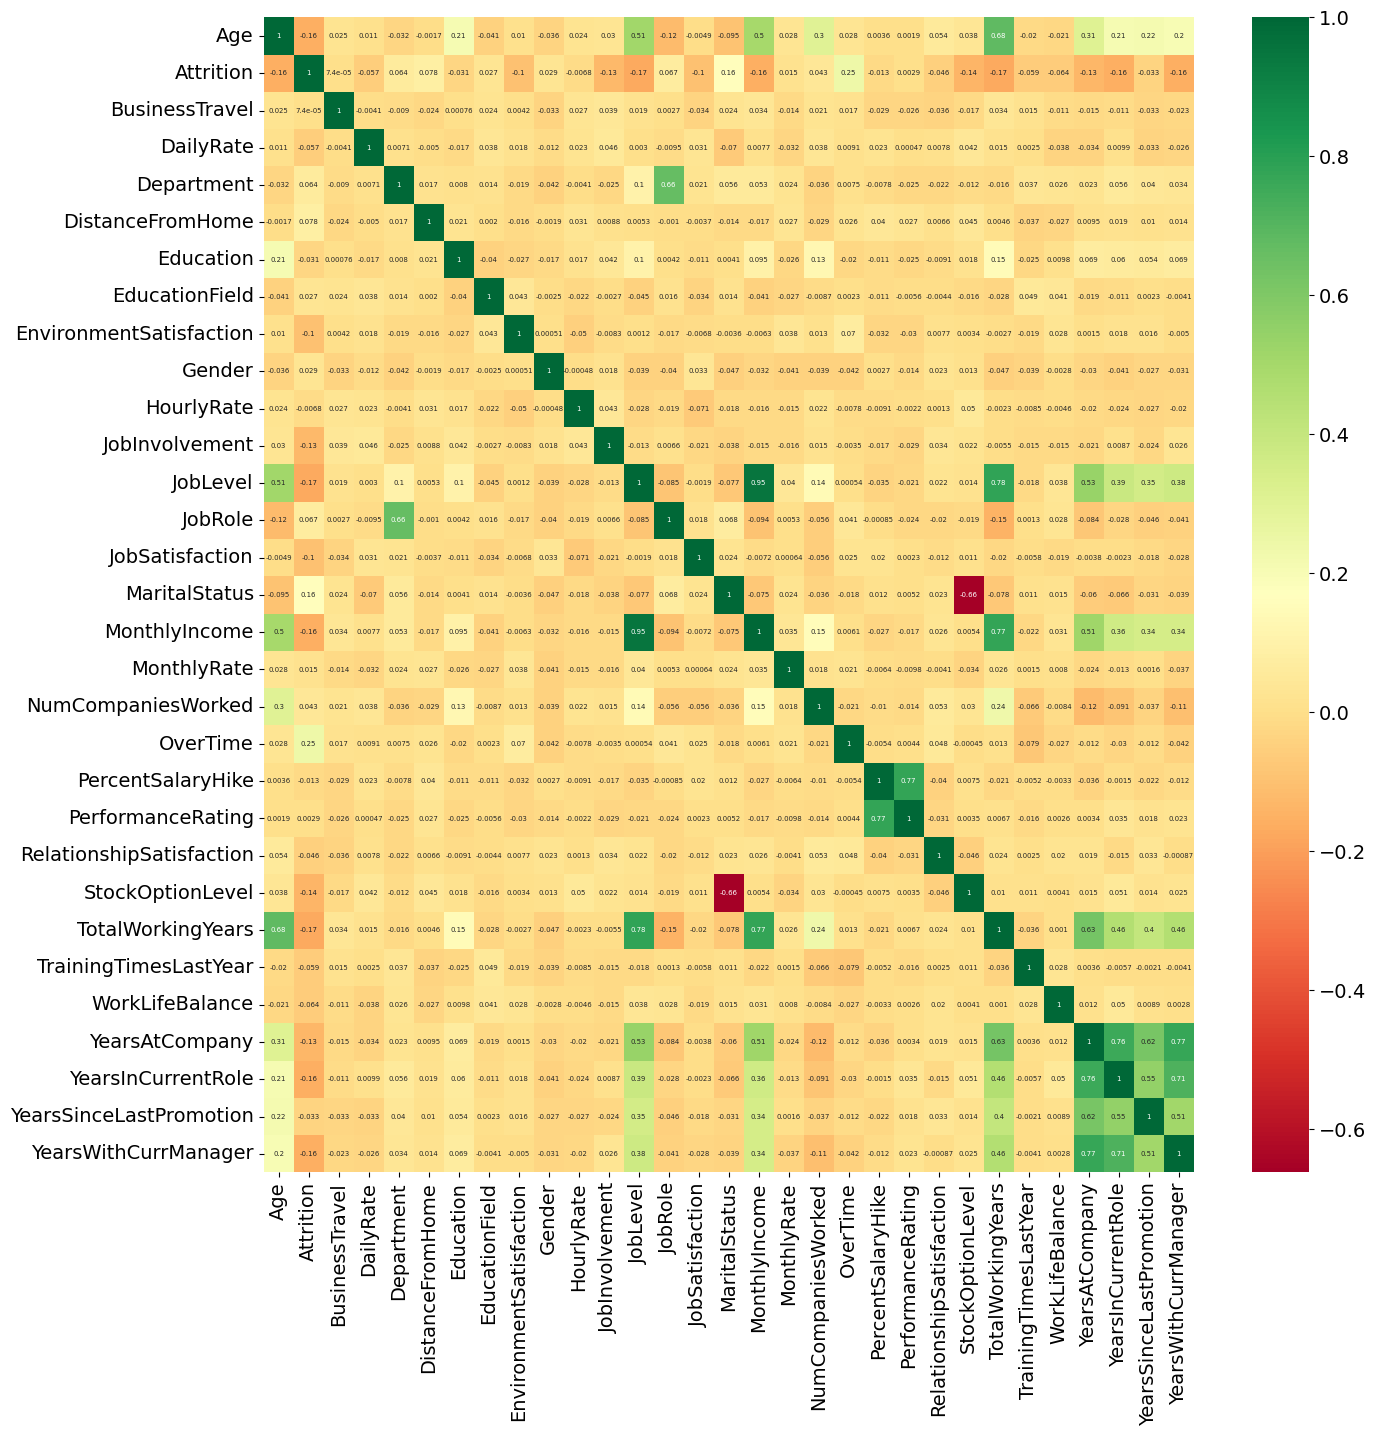

In [35]:
# heatmap to identify which features are most related to the target variable
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":5})
plt.show()

###### The following feartures are highly corroleted

JobLevel and MonthlyIncome

JobLevel and YotalWorkingYears

In [36]:
# Identifying the most relevant features for attrition prediction
x = df.drop(columns=['Attrition'])
y = df['Attrition']

#Feature selection using chi-squared statistics and ANOVA F-statistic
from sklearn.feature_selection import SelectKBest, chi2, f_classif

# Calculate chi-squared statistics for each feature
chi2_scores = chi2(x, y)[0]

# Calculate ANOVA F-statistic and p-values for each feature
f_scores = f_classif(x, y)[0]

# Combine chi-squared and ANOVA scores
combined_scores = chi2_scores + f_scores

scores = pd.DataFrame({'Feature': x.columns, 'Combined_Score': combined_scores})
scores = scores.sort_values(by='Combined_Score', ascending=False)
scores

,Feature,Combined_Score
15,MonthlyIncome,127960.782513
16,MonthlyRate,1196.971469
2,DailyRate,961.307134
23,TotalWorkingYears,274.974109
26,YearsAtCompany,169.101678
18,OverTime,158.501524
27,YearsInCurrentRole,156.360899
29,YearsWithCurrManager,147.383845
0,Age,122.331164
4,DistanceFromHome,72.740418


In [37]:
# Drop all the features with score of 0.5 and below
df.drop(['PercentSalaryHike', 'HourlyRate', 'PerformanceRating', 'BusinessTravel'], axis=1, inplace=True)
df.head()

,Age,Attrition,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,OverTime,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,2,1,2,1,2,0,3,...,1,1,0,8,0,1,6,4,0,5
1,49,0,279,1,8,1,1,3,1,2,...,0,4,1,10,3,3,10,7,1,7
2,37,1,1373,1,2,2,4,4,1,2,...,1,2,0,7,3,3,0,0,0,0
3,33,0,1392,1,3,4,1,4,0,3,...,1,3,0,8,3,3,8,7,3,0
4,27,0,591,1,2,1,3,1,1,3,...,0,4,1,6,3,3,2,2,2,2


### 3. Model Building
Split the dataset into training and testing sets (80% training, 20% testing)

In [38]:
# Splitting the data
X = df.drop(columns=['Attrition'])  # Features
y = df['Attrition']  # Target variable

# Splitting  the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)

# Scale the data using statndard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

numerical = numerical.drop(labels = ['PercentSalaryHike','PerformanceRating','HourlyRate'])
X_train[numerical] = scaler.fit_transform(X_train[numerical])
X_test[numerical] = scaler.transform(X_test[numerical])

Build the model

In [39]:
# Algorithm Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

### 4. Model Training, Testing, and Evaluation
Evaluate the model's performance

Classfication Report
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       245
           1       0.31      0.29      0.30        49

    accuracy                           0.78       294
   macro avg       0.59      0.58      0.58       294
weighted avg       0.77      0.78      0.77       294

Confusion Matrics


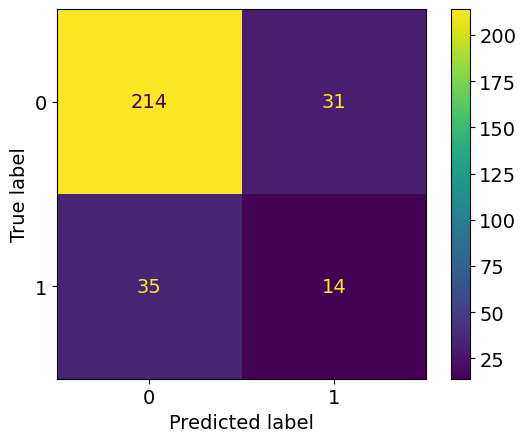

In [42]:
from sklearn import metrics
y_pred = dtc.predict(X_test)
print('Classfication Report')
print(metrics.classification_report(y_test, y_pred))
print('Confusion Matrics')

cm = metrics.confusion_matrix(y_test, y_pred)
metrics.ConfusionMatrixDisplay(cm).plot()

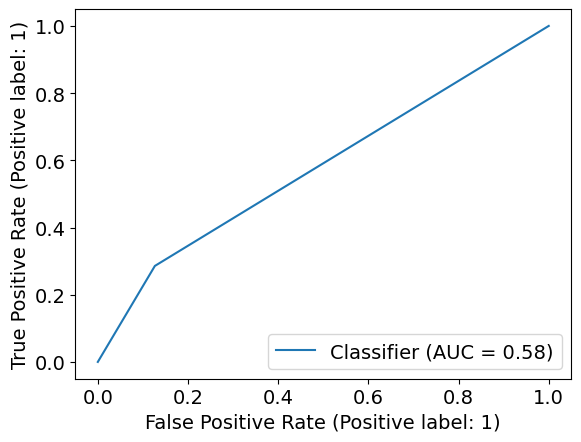

In [41]:
# ROC-AUC Curve
metrics.RocCurveDisplay.from_predictions(y_test, y_pred)
plt.show()